In [83]:
# Dependencies
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openweathermapy.core as owm
import json
import requests
from env.config import api_key
import random as random
from pprint import pprint

In [84]:
# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#1.  generate lat and longs

#How many points will be generated
# numpoints = random.randint(0,50)
coordinates = []

# Create the bounding box
#set latitude values - X values
miny = -45
maxy = 45

#set longitude values - Y values
minx = -180
maxx = 180

In [85]:
#2. lookup citipy based on values and get cities
cities = []
cities_found_count = 0

def verify_unique_city(city):
    return city not in cities


def find_city(lng, lat):
    return citipy.nearest_city(lat, lon)


while cities_found_count<50:
    lat, lon =(random.uniform(minx,maxx),random.uniform(miny,maxy))
    city = citipy.nearest_city(lat, lon)
    if verify_unique_city(city)is True:
        cities.append(city)
        cities_found_count = cities_found_count +1


city_names = []   
for city in cities:
    city_names.append(city.city_name)

In [86]:
#Perform a weather check on each of the cities using a series of successive API calls.

url = "http://api.openweathermap.org/data/2.5/weather?"

city_ids = []
city_lon = []
city_lat = []
city_urls =[]
city_max_temps =[]
city_humidities =[]
city_cloudiness =[]
city_wind_speeds =[]
city_urls =[]

for city_name in city_names:
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city_name
    city_urls.append(query_url)

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
#     pprint(weather_json)
    
    # Try to access key that doesn't exist
    try:
        city_ids.append(weather_json['id'])
    except KeyError:
        city_ids.append("")
        
    try:
        city_lat.append(int(weather_json['coord']['lat']))
    except KeyError:
        city_lat.append(np.nan)
        
    try:
        city_lon.append(int(weather_json['coord']['lon']))
    except KeyError:
        city_lon.append(np.nan)
        
    try:
        city_max_temps.append(weather_json['main']['temp_max'])
    except KeyError:
        city_max_temps.append(np.nan)
        
    try:
        city_humidities.append(weather_json['main']['humidity'])
    except KeyError:
        city_humidities.append(np.nan)
        
    try:
        city_cloudiness.append(weather_json['clouds']['all'])
    except KeyError:
        city_cloudiness.append("")
        
    try:
        city_wind_speeds.append(weather_json['wind']['speed'])
    except KeyError:
        city_wind_speeds.append(np.nan)



{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 78.22, 'lon': 15.63},
 'dt': 1526871000,
 'id': 2729907,
 'main': {'humidity': 91,
          'pressure': 997,
          'temp': 273.15,
          'temp_max': 273.15,
          'temp_min': 273.15},
 'name': 'Longyearbyen',
 'sys': {'country': 'NO',
         'id': 5326,
         'message': 0.0042,
         'sunrise': 0,
         'sunset': 0,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 7.2}}
{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 29.14, 'lon': 21.3},
 'dt': 1526873298,
 'id': 88533,
 'main': {'grnd_level': 1017.53,
          'humidity': 22,
          'pressure': 1017.53,
          'sea_level': 1020.93,
          'temp': 299.576,
          'temp_max': 299.576,
          'temp_min': 299.576},
 'name': 'Awjilah',
 'sys'

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 70.66, 'lon': 23.68},
 'dt': 1526871000,
 'id': 779683,
 'main': {'humidity': 75,
          'pressure': 1008,
          'temp': 279.15,
          'temp_max': 279.15,
          'temp_min': 279.15},
 'name': 'Hammerfest',
 'sys': {'country': 'NO',
         'id': 5296,
         'message': 0.0029,
         'sunrise': 0,
         'sunset': 0,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 12.3}}
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 47.66, 'lon': -52.73},
 'dt': 1526870460,
 'id': 6167817,
 'main': {'humidity': 93,
          'pressure': 999,
          'temp': 282.15,
          'temp_max': 282.15,
          'temp_min': 282.15},
 'name': 'Torbay',
 'sys': {'country': 'CA',
         'id': 3467,
         'message': 0.0047

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 66.69, 'lon': 34.34},
 'dt': 1526873304,
 'id': 479071,
 'main': {'grnd_level': 1028.39,
          'humidity': 68,
          'pressure': 1028.39,
          'sea_level': 1030.62,
          'temp': 282.226,
          'temp_max': 282.226,
          'temp_min': 282.226},
 'name': 'Umba',
 'sys': {'country': 'RU',
         'message': 0.0032,
         'sunrise': 1526858836,
         'sunset': 1526932517},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 221.502, 'speed': 4.67}}
{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 38.52, 'lon': -28.7},
 'dt': 1526873305,
 'id': 3372707,
 'main': {'grnd_level': 1034.63,
          'humidity': 100,
          'pressure': 1034.63,
          'sea_level': 1038.28,
          'temp': 289.026,
          'temp_max': 289.026,
          'temp_min': 289.026},
 'nam

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 37.8, 'lon': -25.58},
 'dt': 1526871600,
 'id': 3372745,
 'main': {'humidity': 72,
          'pressure': 1020,
          'temp': 289.15,
          'temp_max': 289.15,
          'temp_min': 289.15},
 'name': 'Rabo de Peixe',
 'sys': {'country': 'PT',
         'id': 5957,
         'message': 0.0031,
         'sunrise': 1526884070,
         'sunset': 1526935829,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 360, 'speed': 7.2}}
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -3.28, 'lon': -39.27},
 'dt': 1526873308,
 'id': 3386177,
 'main': {'grnd_level': 1025.23,
          'humidity': 100,
          'pressure': 1025.23,
          'sea_level': 1025.31,
          'temp': 300.926,
          'temp_max': 300.926,
          'temp_min': 300.926}

In [87]:
df = pd.DataFrame({
    'City':city_names,
    'id':city_ids,
    'max_temp':city_max_temps,
    'humidity':city_humidities,
    'cloudiness':city_cloudiness,
    'wind_speed':city_wind_speeds,
    "longitude":city_lon,
    'latitude':city_lat,
    'url':city_urls
})
df.set_index('City')

df.head()

,City,cloudiness,humidity,id,latitude,longitude,max_temp,wind_speed
0,longyearbyen,75,91.0,2729907,78.0,15.0,273.150,7.20
1,awjilah,24,22.0,88533,29.0,21.0,299.576,4.62
2,ushuaia,75,80.0,3833367,-54.0,-68.0,277.150,6.07
3,illoqqortoormiut,,NaN,,NaN,NaN,NaN,NaN
4,belushya guba,,NaN,,NaN,NaN,NaN,NaN


In [88]:
df.dropna(how='any', inplace=True)
df.head()

## to do - save as csv file

,City,cloudiness,humidity,id,latitude,longitude,max_temp,wind_speed
0,longyearbyen,75,91.0,2729907,78.0,15.0,273.150,7.20
1,awjilah,24,22.0,88533,29.0,21.0,299.576,4.62
2,ushuaia,75,80.0,3833367,-54.0,-68.0,277.150,6.07
5,araioses,20,87.0,3407351,-2.0,-41.0,299.176,3.17
6,newtownards,92,93.0,2641519,54.0,-5.0,285.150,2.10


## Max Temperature (F) vs. Latitude

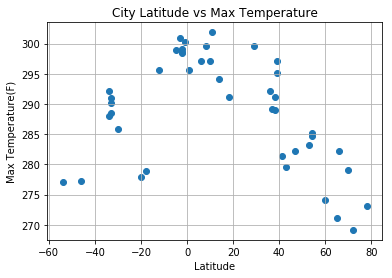

In [89]:
# Max Temperature (F) vs. Latitude
plt.scatter(df["latitude"], df["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("MaxTemperatureByLatitude.png")

# Show plot
plt.show()

## Humidity (%) vs. Latitude

In [ ]:
# Humidity(%) vs. Latitude
plt.scatter(df["latitude"], df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity(%)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("PercentHumidityByLatitude.png")

# Show plot
plt.show()

## Cloudiness (%) vs. Latitude

In [ ]:
# Cloudiness(%) vs. Latitude
plt.scatter(df["latitude"], df["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness(%)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("PercentCloudinessByLatitude.png")

# Show plot
plt.show()

## Wind Speed (mph) vs. Latitude

In [ ]:
# Cloudiness(%) vs. Latitude
plt.scatter(df["latitude"], df["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed(mph)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedByLatitude.png")

# Show plot
plt.show()